## SIAA TEMA 2 GRUPO Ralphy, Grabriel, Made y Mercedes

#### ENUNCIADO: En grupos vais a realizar un estudio sobre un dataset siguiendo los pasos comentados a seguir en machine learning.  Después explicaréis el proceso y vuestras conclusiones al resto da clase. 

<p>Primero de todo, necesitamos descargar el csv que vamos a utilizar, en nuestro caso nos ha tocado el csv de vino rojo, el cuál se encuentra en el siguiente enlace:<p>

[Enlace al csv vino rojo](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)



#### IMPORTS NECESARIOS 📃

- Para este trabajo vamos a necesitas varias librerías. Adjunto un listado de las librerías y para que las necesitaremos:
    * Pandas: necesitaremos esta librería para poder leer el fichero csv descargado.
    * Sklearn: es la librería necesaria para poder realizar todo lo relacionado con la regresión lineal, el error mediático... Dentro de sklearn, utilizaremos estas:
        * Mean_squared_error: librería para poder calcular el error cuadrático medio.
        * Train_test_split: librería necesaria para poder realizar el comportamiento.
        * Ridge: librería necesaria para el algoritmo que tenemos que utilizar. Utilizaremos ridge, ya que hemos observado que todos las características del vino son necesarios para calcular la calidad de este. Por lo tanto, como he enunciado antes, el campo a calcular será la calidad.
        * GridSearchCV: para poder realizar la regresión con ridge con regularización de parámetros con valores fijos de alpha.
        * RandomizedSearchCV: para poder realizar la regresión con ridge con regularización de parámetros con valores random de alpha.
        * R2_score,accuracy_score...: para poder realizar la sigmoide(clasificación binaria) y ver las estadísticas.
    * Matplotlib: la necesitaremos para la representación de datos graficamente.
    * Seaborn: esta librería es necesaria para poder realizar el mapa de calor.
    * Numpy: necesaria para hacer arrays de valores.

#### IMPORTANTE HACER: pip install pandas y pip install

In [63]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report,roc_curve,auc
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from  scipy.stats import uniform
import numpy as np
import seaborn as sns



## PRIMEROS PASOS 👣
<p>Lo primero es descargar el csv de la página indicada anteriormente.<p>
<p>Posteriormente, tendremos que renombrar las columnas(ya que están en inglés y para mejor manejo las traduciremos al español), además de normalizar los datos ya que algunos campos cuentan con decimales de formato:0.xx00000x, por lo tanto los redondearemos(debido a la observación de datos realizada antes de empezar el trabajo) a 3 decimales para poder hacer un trato de datos coherente y a la vez acertado<p>

In [64]:
vino_df=pd.read_csv("winequality-red.csv")
vino_df.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']
vino_df
vino_df['Densidad'] = vino_df['Densidad'].apply(lambda x: f"{x:,.3f}")
vino_df['Cloruros'] = vino_df['Cloruros'].apply(lambda x: f"{x:,.3f}")
vino_df

,Acido Fijo,Acido Volatil,Acido Citrico,Azucar Residual,Cloruros,Dioxido de sulfuro libre,Dioxido de sulfuro total,Densidad,Ph,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5


* Columnas que queremos calcular:
    * Alcohol: el alcohol del vino se debe a la cantidad de cada componente que tiene, debido a que una variación pequeña puede representar otro valor totalmente distinto de alcohol, por lo tanto esta columna requiere del resto de parámetros para poder ser calculada.
    * Calidad: con la calidad pasa lo mismo, depende del sabor del vino, el color.... y todo eso es dependiente de su composición, por lo tanto esta columna también depende del resto de parámetros para poder ser calculada.

##### Estas columnas se calculan de la misma manera así que solo explicaremos el procedimiento una vez

#### Mostramos las columnas a calcular

In [65]:
vino_df[['Alcohol', 'Calidad']] 

,Alcohol,Calidad
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


#### Una vez leído el dataset y mostradas las columnas que vamos a calcular, haremos un mapa de calor para ver la correlación de las variables.🗺️

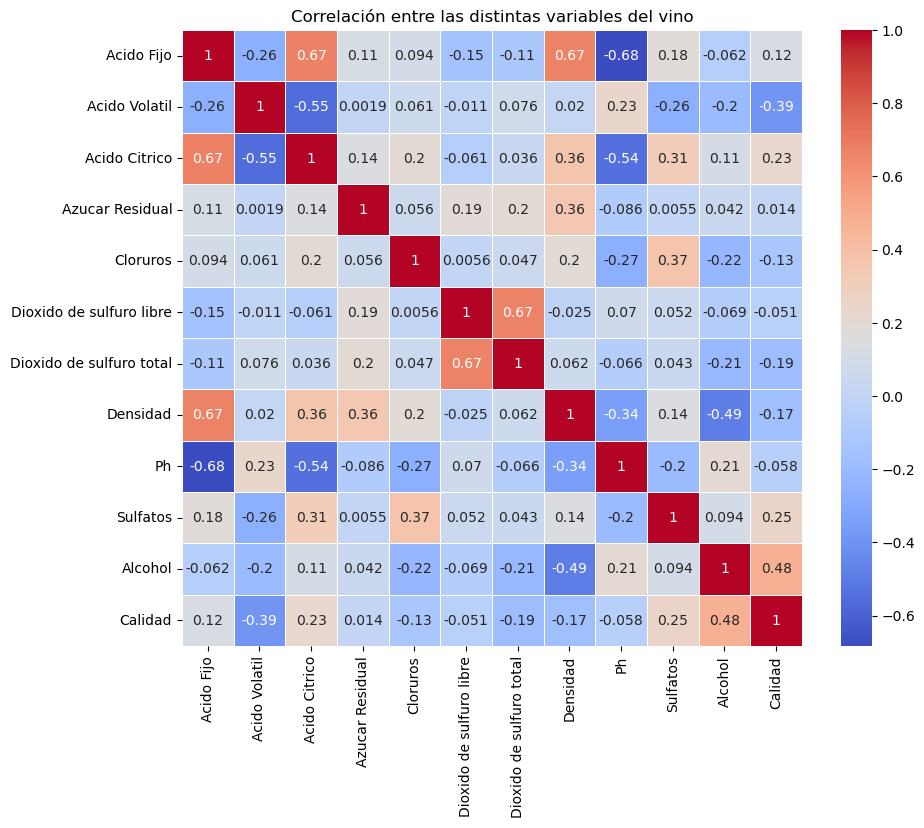

In [66]:
plt.figure(figsize=(10,8))
plt.title("Correlación entre las distintas variables del vino")
sns.heatmap(vino_df.corr(), linewidths=0.5, cmap="coolwarm", annot=True)
plt.show()

#### Definir las variables
     
<p>La x serán las características que nos ayudarán a calcular el alcohol y la calidad.<p>
<p>La y será lo que queremos calcular, en este caso, hemos puesto el alcohol porque es con lo que vamos a hacer el ejemplo. Más abajo se mostrará lo mismo pero con la columna calidad.<p>

In [67]:
X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]
y = vino_df['Alcohol']

#### Dividir el entrenamiento y prueba(80% entrenaiento, 20% test)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Entrenamiento del modelo de diferentes formas para poder obtener el menor error cuadrático medio. 🏋🏼‍♀️

Entrenar el modelo con RidgeGridSearch

In [69]:
param_grid = {'alpha': [0.01,0.1, 1, 10, 100]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
# Hacer predicciones
prediccion_ridge = ridge_cv.predict(X_test)

mse_lineal = mean_squared_error(y_test, prediccion_ridge)
r2_lineal = r2_score(y_test,prediccion_ridge)

print(f"Regresión Lineal - MSE: {mse_lineal:.2f}")
print(f"Regresión Lineal - R²: {r2_lineal:.2f}")

Regresión Lineal - MSE: 0.63
Regresión Lineal - R²: 0.46


Entrenar el modelo con RandomSearch

In [70]:
#RANDOM
ridge = Ridge()
param_grid={'alpha':uniform(0.1,100)}
random_search = RandomizedSearchCV(ridge,param_distributions=param_grid,n_iter=100,cv=5, random_state=0)
random_search.fit(X_train,y_train)
prediccion_random = random_search.predict(X_test)

mse_lineal = mean_squared_error(y_test, prediccion_random)
r2_lineal = r2_score(y_test,prediccion_random)

print(f"Regresión Lineal - MSE: {mse_lineal:.2f}")
print(f"Regresión Lineal - R²: {r2_lineal:.2f}")

Regresión Lineal - MSE: 0.73
Regresión Lineal - R²: 0.38


Entrenar el modelo con LinearRegression

In [71]:
modelo = LinearRegression()

modelo.fit(X_train,y_train)

prediccionesLinear = modelo.predict(X_test)
mse_lineal = mean_squared_error(y_test, prediccionesLinear)
r2_lineal = r2_score(y_test,prediccionesLinear)

print(f"Regresión Lineal - MSE: {mse_lineal:.2f}")
print(f"Regresión Lineal - R²: {r2_lineal:.2f}")


Regresión Lineal - MSE: 0.33
Regresión Lineal - R²: 0.72


#### En conclusión, hemos decidido utilizar la regresión lineal, ya que como se muestra arriba, el error cuadrático medio es menor que cuando usamos grid search o random search(ridge)

#### Mostramos los resultados 📊

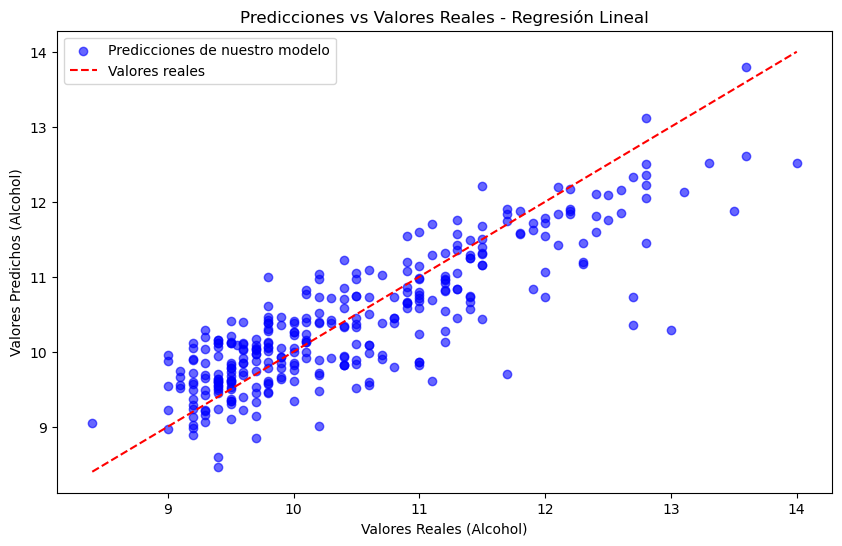

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediccionesLinear, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test.min(), prediccionesLinear.min()), max(y_test.max(), prediccionesLinear.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.legend()
plt.show()



#### Ahora con la calidad

<p>Este no lo documentamos debido a que es el mismo proceso que arriba pero con la columna calidad en vez de con la de alcohol.<p>

Regresión Lineal - Media cuadrática: 0.43
Regresión Lineal - R²: 0.29


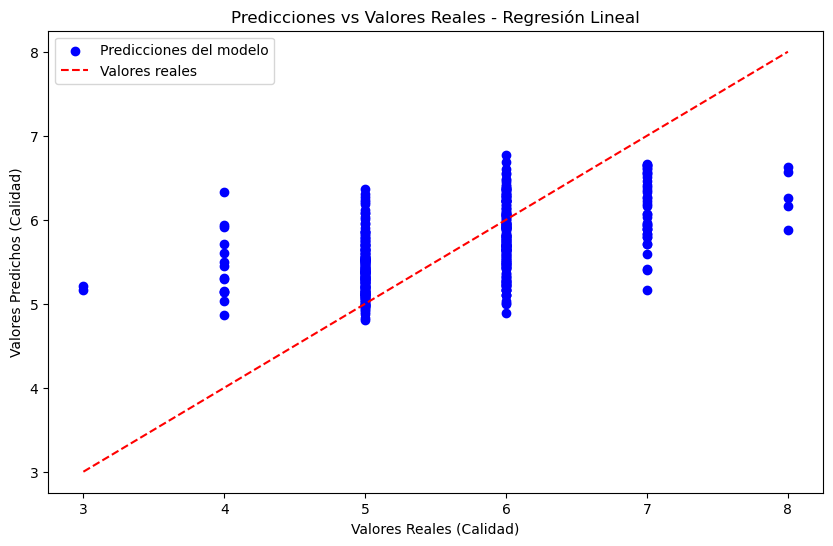

In [73]:

# División de datos
X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros',
             'Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos']]
y = vino_df['Calidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Modelo de regresión
modeloCalidad = LinearRegression()
modeloCalidad.fit(X_train, y_train)

# Predicción
prediccionesCalidad = modeloCalidad.predict(X_test)

# Evaluación
mse_lineal = mean_squared_error(y_test, prediccionesCalidad)
r2_lineal = r2_score(y_test, prediccionesCalidad)

print(f"Regresión Lineal - Media cuadrática: {mse_lineal:.2f}")
print(f"Regresión Lineal - R²: {r2_lineal:.2f}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediccionesCalidad, color='blue', label='Predicciones del modelo')

# Ajuste de límites y línea de referencia
limites = np.array([min(y_test.min(), prediccionesCalidad.min()), 
                    max(y_test.max(), prediccionesCalidad.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')

plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Calidad)')
plt.ylabel('Valores Predichos (Calidad)')
plt.legend()
plt.show()


#### REGRESIÓN LOGÍSTICA 💯

<p>Con la regresión logística haremos una clasificación binaria del alcohol de vino(1 mucho y 0 poco).<p>
<p>Convertir la columna de alcohol en una variable binaria: mucho alcohol (>=10) y poco alcohol (<10).<p>
 <p>Lo hacemos con 6 y más abajo lo haremos con cinco para comparar, ya que hay muchos que de calidad tienen 5 o menos y queremos ver los distintos resultados según el sesgo.

<p>

In [74]:
vino_df['Alcohol_binario'] = vino_df['Alcohol'].apply(lambda x: 1 if x >= 10 else 0)
vino_df


,Acido Fijo,Acido Volatil,Acido Citrico,Azucar Residual,Cloruros,Dioxido de sulfuro libre,Dioxido de sulfuro total,Densidad,Ph,Sulfatos,Alcohol,Calidad,Alcohol_binario
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5,1


#### Realizamos el entrenamiento de forma 75/25(75 entrenamiento,25 test)

<p>Valor que queremos calcular: el alcohol binario(igual o más de 10 es mucho y menos de 10 es poco).<p>
<p>Valor que vamos a utilizar para calcular esto: la Calidad, debido a que es el valor más relacionado con el alcohol, según se puede observar en el mapa de calor de arriba(con un 0.48 de interrelación).<p>

In [75]:
X = vino_df[['Calidad']]
y = vino_df['Alcohol_binario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



#### Ahora realizaremos la regresión logística

<p>Cogemos los valores mínimo y máximo de la columna que nos interesa(calidad).<p>
<p>En la parte de: X_range_df = pd.DataFrame(X_range, columns=['Calidad']), le reiteramos que queremos la columna calidad para que nuestro modelo no tenga confusión.<p>

In [76]:
modelo = LogisticRegression(max_iter=1000, random_state=0)
modelo.fit(X_train, y_train)
X_range = np.linspace(X['Calidad'].min(), X['Calidad'].max(), 300).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=['Calidad'])
y_prob = modelo.predict_proba(X_range_df)[:, 1]  # Probabilidad de Alcohol ≥ 10

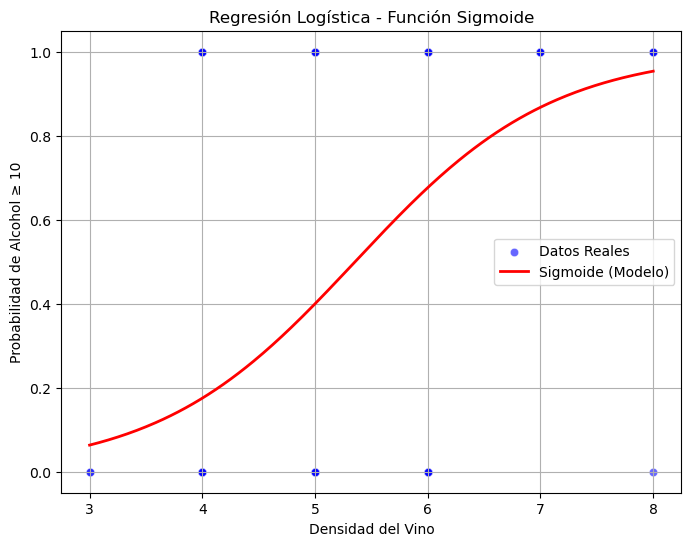

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Calidad'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)
plt.plot(X_range, y_prob, color='red', linewidth=2, label="Sigmoide (Modelo)")
plt.xlabel("Densidad del Vino")
plt.ylabel("Probabilidad de Alcohol ≥ 10")
plt.title("Regresión Logística - Función Sigmoide")
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# Realizar las predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       160
           1       0.80      0.72      0.76       240

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



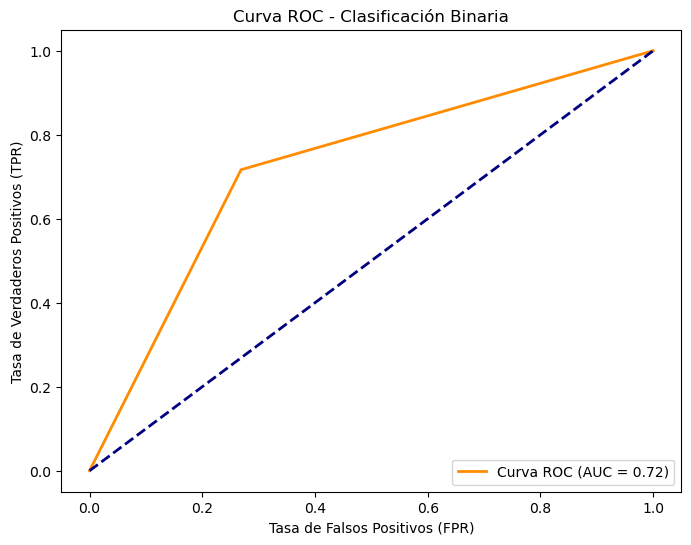

In [79]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria')
plt.legend(loc='lower right')
plt.show()

### Resumen del reporte de clasificación

- **Precisión**:
  - **Clase 0**: 0.63 (El 63% de las predicciones de la clase 0 (Poco alcohol) fueron correctas).
  - **Clase 1**: 0.80 (El 80% de las predicciones de la clase 1 (Mucho alcohol) fueron correctas).

- **Recall**:
  - **Clase 0**: 0.73 (El 73% de las instancias reales de la clase 0 (Poco alcohol) fueron correctamente identificadas).
  - **Clase 1**: 0.72 (El 72% de las instancias reales de la clase 1 (Mucho alcohol) fueron correctamente identificadas).

- **F1-Score**:
  - **Clase 0**: 0.68 (Balance entre precisión y recall para la clase 0 (Poco alcohol)).
  - **Clase 1**: 0.76 (Balance entre precisión y recall para la clase 1 (Mucho alcohol)).

- **Exactitud (Accuracy)**: 0.72 (El 72% de las predicciones fueron correctas).

- **Resumen de las métricas**: 
  - Precisión: 0.73
  - Recall: 0.72
  - F1-score: 0.72

### Interpretación:
- El modelo tiene una **precisión** aceptable para ambas clases, pero mejor para la clase `1` (80% vs. 63%).
- El **recall** también es bastante bueno para ambas clases, pero ligeramente mejor para la clase `0` (73% vs. 72%).
- El **F1-score** es más alto para la clase `1`, lo que significa que tiene un mejor balance entre precisión y recall para esta clase.
- La **exactitud** del modelo es del 72%, lo que significa que acierta el 72% de las predicciones, lo cual es decente.

### Conclusiones de las métricas obtenidas:
El modelo es relativamente bueno, pero tiene más dificultades para predecir la clase `0`(que no tenga alcohol) con alta precisión.


## Conclusiones

##### En este caso usamos la regresión lineal porque al haber valores tan dispersos entre sí, es decir, hay tanto valores que son completamente decimales(como pueden ser los cloruros, la densidad...) como valores que tienen más parte entera(como por ejemplo dióxido de sulfuro, tanto el total como el libre), ridge descartaba valores que eran importantes para el cálculo, y por lo tanto, como se puede observar en las casillas de arriba, daba un fallo considerablemente mayor al que nos propone la lineal(ridge nos da un fallo de 0.79, en cambio la regresión lineal nos da un fallo de 0.36).

##### Además, utilizaremos la clasificación binaria(sigmoide) para saber si tiene mucho alcohol(más de 10 grados) o poco(menos de 10 grados), a través de la característica Calidad, sabiendo que, si supera 0.5, se considerará como 1(mucho) y si no lo supera, se considerará 0(poco). Utilizaremos la característica de Calidad, porque es la que MÁS está relacionada con el nivel de alcohol, según el mapa de calor que podemos observar arriba y, debido a esto, es la única que puede hacer una clasificación binaria visible.

##### Para concluír, hemos observado que gracias al fallo bajo de la regresión lineal(0.33), nuestro modelo es capaz de tener una precisión de más de un 60%, que nuestro modelo ha sido capaz de identificar los casos de manera correcta en más de un 70% y además podemos observar que suele acetar más en que tiene mucho alcohol.

